In [1]:
from configs import CFG1, TextBoxCFG, ImageCFG, Point
from generators import create_image
from generation_utils import split_sentence

In [2]:
import pandas as pd

messages = pd.read_csv("texts/message_samples.csv")
names = pd.read_csv("texts/name_samples.csv")
messages.shape, names.shape

((14, 5), (10, 5))

思い付きだけで動くのじゃぞ。それに、<ruby>殿下<rt>でんか</rt></ruby>のご<ruby>体調<rt>たいちょう</rt></ruby>を考えれば<ruby>無理<rt>むり</rt></ruby>に動かれるべきではございませぬ
<ruby>高野<rt>たかの</rt></ruby>
テアトル<ruby>新宿<rt>しんじゅく</rt></ruby>で『<ruby>銀狐<rt>ぎんぎつね</rt></ruby>』の<ruby>劇場公演<rt>げきじょうこうえん</rt></ruby>を見てるんだ。
<ruby>用紙<rt>ようし</rt></ruby>の<ruby>束<rt>たば</rt></ruby>が山積みになった<ruby>机<rt>つくえ</rt></ruby>の<ruby>上<rt>うえ</rt></ruby>で、その紙切れは燃えた


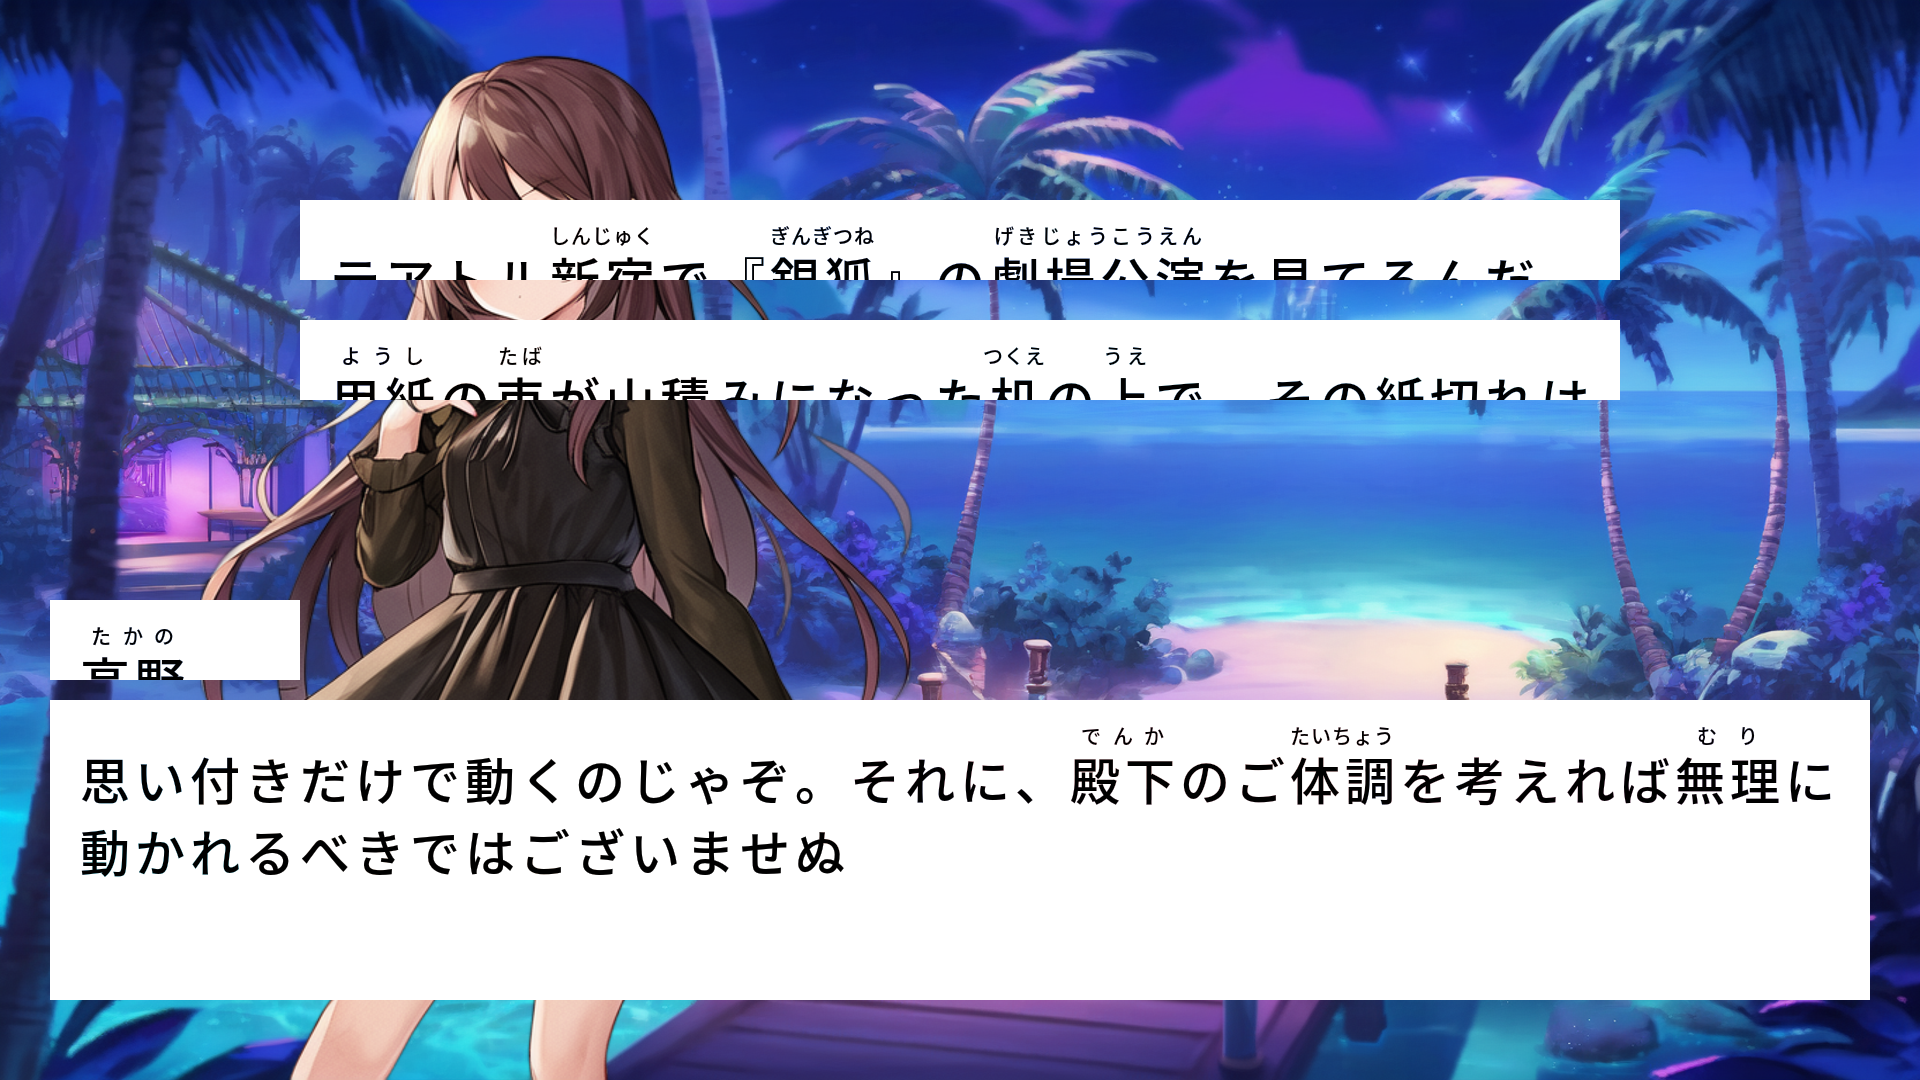

In [3]:
cfg = CFG1()

# 背景画像
cfg.bg_cfg = ImageCFG(path="./sample_images/sample_bg.png")

# キャラクター画像
cfg.character_cfg_list = [
    ImageCFG(path="./sample_images/sample_character.png", tl=Point(200, 0))
    ]

# メッセージ
text = messages.sample(1)["text_ruby_hiragana"].values[0]
cfg.msgbox.text = text
cfg.msgbox.tl = Point(50, 700)
cfg.msgbox.br = Point(1870, 1000)
print(text)

# 名前
name_text = names.sample(1)["text_ruby_hiragana"].values[0]
cfg.namebox.text = name_text
cfg.namebox.tl = Point(50, 600)
cfg.namebox.br = Point(300, 680)
print(name_text)

# 選択肢
for i in range(2):
    option_text = split_sentence(messages.sample(1)["text_ruby_hiragana"].values[0])[0]
    option_cfg = TextBoxCFG()
    option_cfg.text = option_text
    option_cfg.tl = Point(300, 200+120*i)
    option_cfg.br = Point(1620, 280+120*i)
    print(option_text)
    cfg.optionbox_list.append(option_cfg)

output = create_image(cfg)

display(output.image)

In [4]:
output.name_text, output.text, output.option_texts

('<ruby>高野<rt>たかの</rt></ruby>',
 '思い付きだけで動くのじゃぞ。それに、<ruby>殿下<rt>でんか</rt></ruby>のご<ruby>体調<rt>たいちょう</rt></ruby>を考えれば<ruby>無理<rt>むり</rt></ruby>に動かれるべきではございませぬ',
 ['テアトル<ruby>新宿<rt>しんじゅく</rt></ruby>で『<ruby>銀狐<rt>ぎんぎつね</rt></ruby>』の<ruby>劇場公演<rt>げきじょうこうえん</rt></ruby>を見てるんだ。',
  '<ruby>用紙<rt>ようし</rt></ruby>の<ruby>束<rt>たば</rt></ruby>が山積みになった<ruby>机<rt>つくえ</rt></ruby>の<ruby>上<rt>うえ</rt></ruby>で、その紙切れは'])